In [4]:
from sklearn.ensemble import RandomForestClassifier
import os 
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [5]:
# Load data
data_path = "../../data"
X_train = pd.read_csv(os.path.join(data_path, "X_train_pca.csv"))
y_train_org = pd.read_csv(os.path.join(data_path, "y_train_pca.csv"))
X_test = pd.read_csv(os.path.join(data_path, "X_test_pca.csv"))
y_test_org = pd.read_csv(os.path.join(data_path, "y_test_pca.csv"))


In [6]:
y_test_org.columns

Index(['Extraversion', 'Agreeableness', 'Conscientiousness',
       'Emotional Stability', 'Openness', 'Extraversion_bin',
       'Agreeableness_bin', 'Conscientiousness_bin', 'Emotional Stability_bin',
       'Openness_bin'],
      dtype='object')

In [7]:
# model trait (choose a bin (for classification))
trait = "Openness_bin"
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y_train = [label_mapping[label] for label in y_train_org[trait]]
y_test = [label_mapping[label] for label in y_test_org[trait]]

In [8]:
random_forest_model = RandomForestClassifier(random_state=27)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=27)

In [9]:

# Example predictions and true labels
y_pred = random_forest_model.predict(X_test)
y_true = y_test

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.6971153846153846
Precision: 0.7151162790697675
Recall: 0.8978102189781022
F1-Score: 0.796116504854369
ROC AUC: 0.6038346869538399
Confusion Matrix:
[[246  28]
 [ 98  44]]


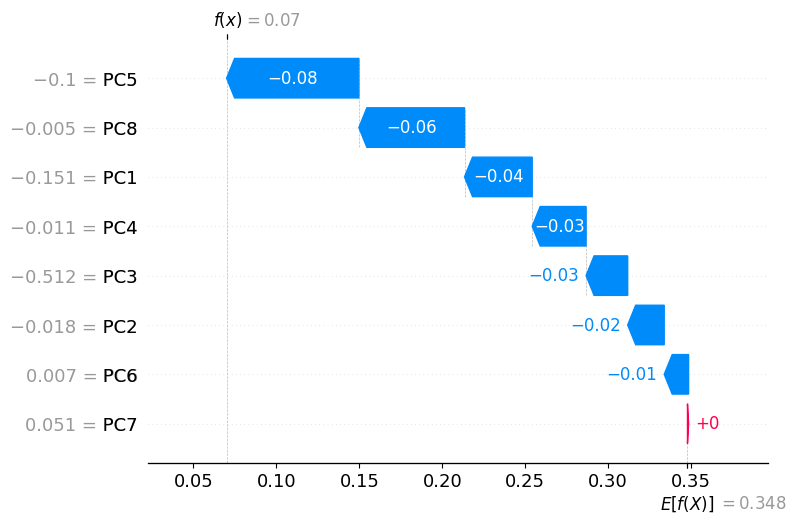

In [10]:
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

import shap
explainer = TreeExplainer(random_forest_model)
sv = explainer(X_train)
exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X_train.values, 
                  feature_names=X_train.columns)
idx = 0
waterfall(exp[idx])